In [116]:
import sympy as sp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [117]:
# Initialize SymPy symbols
sp.init_printing(use_unicode=False, use_latex="mathjax")
m, b, x, y = sp.symbols('m b x y')

In [118]:
# --- STEP 1: HYPOTHESIS ---
hypothesis = m * x + b
print("\nStep 1: Hypothesis Formula")
sp.pprint(hypothesis)


Step 1: Hypothesis Formula
b + m*x


In [119]:
# --- STEP 2: COST FUNCTION (MSE) ---
cost_func = (hypothesis - y)**2
print("\nStep 2: Cost Function (Single Point MSE)")
sp.pprint(cost_func)


Step 2: Cost Function (Single Point MSE)
             2
(b + m*x - y) 


In [120]:
# --- STEP 3: DIFFERENTIAL EQUATIONS & GRADIENTS ---
# Create unevaluated derivative objects for display
grad_m_eqn = sp.Derivative(cost_func, m)
grad_b_eqn = sp.Derivative(cost_func, b)

In [121]:
# Calculate the actual derivative expressions
grad_m_expr = grad_m_eqn.doit()
grad_b_expr = grad_b_eqn.doit()

In [122]:
print("\nStep 3: Symbolic Gradients (Calculus)", end="\n")
print("Partial Derivative for Weight (m):", end="\n")

print("\n\n")
sp.pprint(grad_m_eqn) 
print("Evaluates to:")
sp.pprint(grad_m_expr)


Step 3: Symbolic Gradients (Calculus)
Partial Derivative for Weight (m):



d /             2\
--\(b + m*x - y) /
dm                
Evaluates to:
2*x*(b + m*x - y)


In [123]:
print("\nPartial Derivative for Bias (b):")


print("\n\n")
sp.pprint(grad_b_eqn)
print("Evaluates to:")
sp.pprint(grad_b_expr)


Partial Derivative for Bias (b):



d /             2\
--\(b + m*x - y) /
db                
Evaluates to:
2*b + 2*m*x - 2*y


In [124]:
# --- STEP 4: DATA LOADING WITH PANDAS ---
try:
    # Replace 'data.csv' with your actual file path
    df = pd.read_csv('../data/Salary_Data.csv') 
    X_train = df['YearsExperience'].values
    Y_train = df['Salary'].values
    print("\nData successfully loaded from CSV using Pandas.")
   
except FileNotFoundError:
    print("\nCSV not found. Using placeholder data for demonstration.")
    X_train = np.array([1, 2, 3, 4, 5])
    Y_train = np.array([3.1, 4.9, 7.2, 8.8, 11.1])
    
print("X_train = " ,X_train)
print("Y_train = ", Y_train)


Data successfully loaded from CSV using Pandas.
X_train =  [ 1.1  1.3  1.5  2.   2.2  2.9  3.   3.2  3.2  3.7  3.9  4.   4.   4.1
  4.5  4.9  5.1  5.3  5.9  6.   6.8  7.1  7.9  8.2  8.7  9.   9.5 10.5]
Y_train =  [ 39343.  46205.  37731.  43525.  39891.  56642.  60150.  54445.  64445.
  57189.  63218.  55794.  56957.  57081.  61111.  67938.  66029.  83088.
  81363.  93940.  91738.  98273. 101302. 113812. 109431. 105582. 116969.
 121872.]


In [125]:
# --- STEP 5: GRADIENT DESCENT TRAINING ---
def train_linear_regression(data_x, data_y, lr=0.01, epochs=1000):
    curr_m, curr_b = 0.0, 0.0
    n = len(data_x)
    print(f"\nStep 5: Training (LR={lr}, Epochs={epochs})...")
    
    for epoch in range(epochs):
        sum_grad_m = 0
        sum_grad_b = 0
        for xi, yi in zip(data_x, data_y):
            subs = {m: curr_m, b: curr_b, x: xi, y: yi}
            sum_grad_m += grad_m_expr.subs(subs)
            sum_grad_b += grad_b_expr.subs(subs)
            
        curr_m -= lr * (sum_grad_m / n)
        curr_b -= lr * (sum_grad_b / n)
        
        if epoch % 250 == 0:
            print(f"  Epoch {epoch}: m = {float(curr_m):.4f}, b = {float(curr_b):.4f}")
            
    return float(curr_m), float(curr_b)



In [126]:

# --- STEP 6: ACCURACY & VISUALIZATION ---
def evaluate_and_plot(data_x, data_y, fm, fb):
    y_true = np.array(data_y)
    y_pred = fm * data_x + fb
    
    # Accuracy Metrics
    r2 = 1 - (np.sum((y_true - y_pred)**2) / np.sum((y_true - np.mean(y_true))**2))
    mae = np.mean(np.abs(y_true - y_pred))
    
    print("\nStep 6: Accuracy Metrics")
    print(f"  - R² Score: {r2:.4f}")
    print(f"  - Mean Absolute Error (MAE): {mae:.4f}")

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.scatter(data_x, data_y, color='red', label='Actual Data')
    plt.plot(data_x, y_pred, color='blue', label=f'Model: y={fm:.2f}x + {fb:.2f}')
    plt.title('Linear Regression Fit (SymPy + Pandas)')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

In [127]:
cost_lambda = sp.lambdify((m, b, x, y), cost_func, 'numpy')

def compute_total_cost(m_val, b_val, x_data, y_data):
    # Calculates the average MSE for a grid of m and b values
    total_error = 0
    for xi, yi in zip(x_data, y_data):
        total_error += cost_lambda(m_val, b_val, xi, yi)
    return total_error / len(x_data)


Step 5: Training (LR=0.01, Epochs=1000)...


  Epoch 0: m = 8557.1698, b = 1460.7600
  Epoch 250: m = 10873.4333, b = 17165.0690
  Epoch 500: m = 10029.6941, b = 22466.1300
  Epoch 750: m = 9730.6509, b = 24344.9651

Step 6: Accuracy Metrics
  - R² Score: 0.9490
  - Mean Absolute Error (MAE): 4746.8389


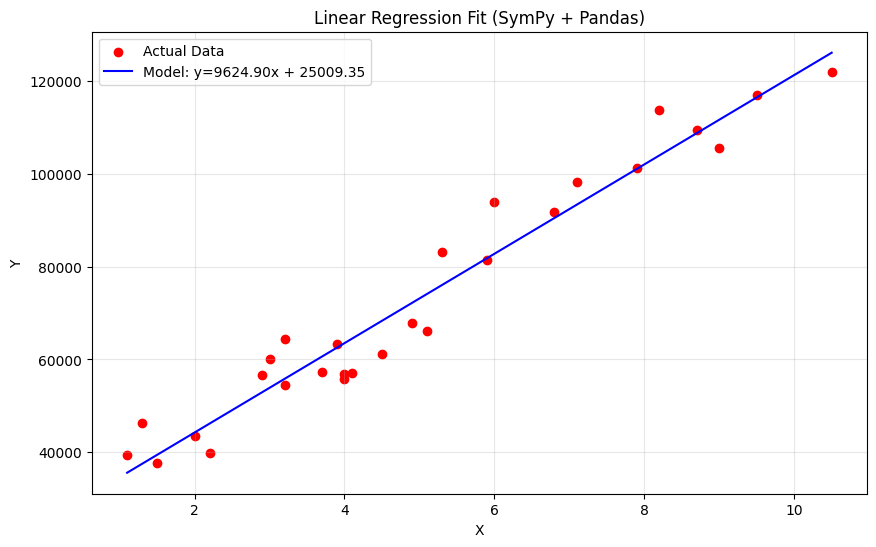

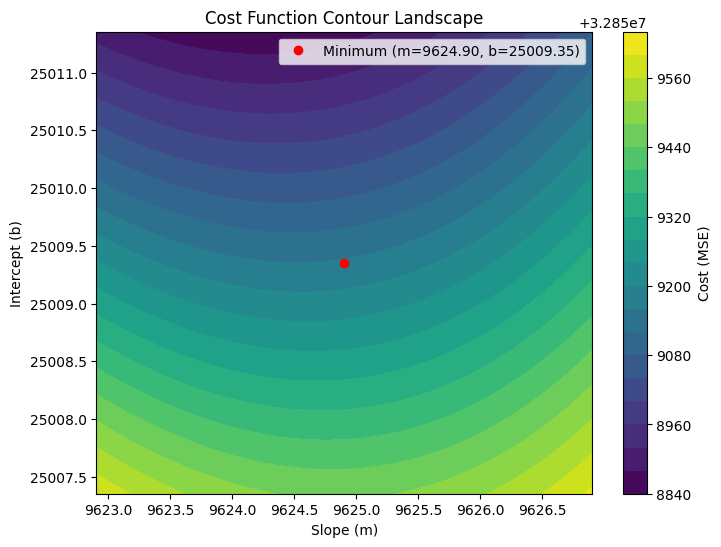

In [128]:
# --- STEP 7: CONTOUR PLOT VISUALIZATION ---
def plot_cost_contour(data_x, data_y, fm, fb):
    # 1. Create a grid of m and b values around our final solution
    m_range = np.linspace(fm - 2, fm + 2, 50)
    b_range = np.linspace(fb - 2, fb + 2, 50)
    M, B = np.meshgrid(m_range, b_range)
    
    # 2. Compute cost for every point on the grid
    Z = np.array([compute_total_cost(mv, bv, data_x, data_y) for mv, bv in zip(np.ravel(M), np.ravel(B))])
    Z = Z.reshape(M.shape)
    
    # 3. Plotting
    plt.figure(figsize=(8, 6))
    cp = plt.contourf(M, B, Z, levels=20, cmap='viridis') # Filled contours
    plt.colorbar(cp, label='Cost (MSE)')
    
    # Mark the final optimized point
    plt.plot(fm, fb, 'ro', label=f'Minimum (m={fm:.2f}, b={fb:.2f})')
    
    plt.title('Cost Function Contour Landscape')
    plt.xlabel('Slope (m)')
    plt.ylabel('Intercept (b)')
    plt.legend()
    plt.show()
    
final_m, final_b = train_linear_regression(X_train, Y_train)
evaluate_and_plot(X_train, Y_train, final_m, final_b)
plot_cost_contour(X_train, Y_train, final_m, final_b)

In [129]:
# Testing the Model
df_test = pd.read_csv("../data/Salary_Data_test.csv")

df_test

,YearsExperience,Salary
0,9.6,112635.0
1,10.3,122391.0


In [130]:
X_test = df_test["YearsExperience"].values
y_test = df_test["Salary"].values

In [131]:
X_test

array([ 9.6, 10.3])

In [132]:
y_test

array([112635., 122391.])

In [133]:
def predict(x_test):
    y_preds = []
    for x_t in x_test:
        res = final_m * x_t + final_b
        y_preds.append(res)
    return y_preds
        